In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

In [17]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


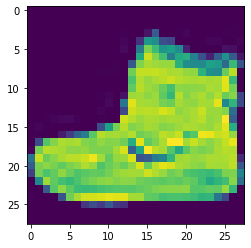

In [7]:
plt.imshow(x_train[0])

In [18]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (2, 2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Take a look at the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 27, 27, 32)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        8256      
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                92170     
                                                                 
Total params: 100,586
Trainable params: 100,586
Non-trainable params: 0
________________________________________________

In [21]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [22]:
results = model.fit(x_train, y_train, epochs=10, batch_size=1000)

Epoch 1/10
60/60 [==============================] - 29s 110ms/step - loss: 0.8676 - accuracy: 0.7171
Epoch 2/10
60/60 [==============================] - 7s 112ms/step - loss: 0.4695 - accuracy: 0.8338
Epoch 3/10
60/60 [==============================] - 7s 112ms/step - loss: 0.4060 - accuracy: 0.8586
Epoch 4/10
60/60 [==============================] - 7s 112ms/step - loss: 0.3753 - accuracy: 0.8686
Epoch 5/10
60/60 [==============================] - 7s 111ms/step - loss: 0.3577 - accuracy: 0.8746
Epoch 6/10
60/60 [==============================] - 7s 111ms/step - loss: 0.3446 - accuracy: 0.8782
Epoch 7/10
60/60 [==============================] - 7s 111ms/step - loss: 0.3270 - accuracy: 0.8855
Epoch 8/10
60/60 [==============================] - 7s 110ms/step - loss: 0.3203 - accuracy: 0.8877
Epoch 9/10
60/60 [==============================] - 7s 110ms/step - loss: 0.3077 - accuracy: 0.8915
Epoch 10/10
60/60 [==============================] - 7s 110ms/step - loss: 0.3007 - accuracy: 0.894

In [25]:
results.history

{'loss': [0.8675851821899414,
  0.4695221483707428,
  0.40596118569374084,
  0.3753136098384857,
  0.35771337151527405,
  0.3445642590522766,
  0.3270074129104614,
  0.32032662630081177,
  0.30773910880088806,
  0.3007499575614929],
 'accuracy': [0.7171333432197571,
  0.833816647529602,
  0.8586166501045227,
  0.8686000108718872,
  0.8745666742324829,
  0.8782166838645935,
  0.885533332824707,
  0.887666642665863,
  0.8915333151817322,
  0.8947666883468628]}

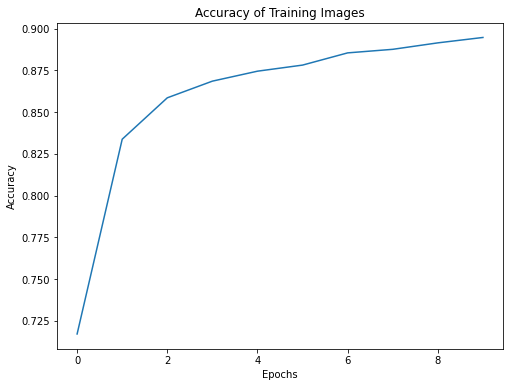

In [27]:
plt.figure(figsize = (8, 6))
plt.plot(results.history['accuracy'])
plt.title("Accuracy of Training Images")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [33]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 5s - loss: 0.3265 - accuracy: 0.8859 - 5s/epoch - 16ms/step

Test accuracy: 0.8859000205993652


In [31]:
test_accuracy
predictions

array([[1.6933384e-06, 2.4509571e-08, 2.2201612e-06, ..., 2.4187613e-02,
        2.1397285e-03, 9.6327335e-01],
       [8.2486724e-05, 2.1807396e-09, 9.9729699e-01, ..., 1.5202359e-14,
        9.0423208e-07, 3.7184422e-11],
       [7.7671785e-07, 9.9999619e-01, 3.2247265e-09, ..., 3.6665329e-10,
        6.2362955e-09, 2.4137242e-10],
       ...,
       [1.0150063e-02, 1.1179531e-07, 2.7595346e-03, ..., 2.0342311e-05,
        9.3980855e-01, 7.1134380e-08],
       [1.4444117e-07, 9.9951792e-01, 2.5504827e-09, ..., 1.8982133e-08,
        1.2015605e-07, 1.5928234e-07],
       [2.0036241e-04, 2.6241019e-06, 1.5997391e-03, ..., 2.6791400e-01,
        3.3141717e-02, 1.9339275e-03]], dtype=float32)